# SMRITI AMATYA


## load the previous data and target

In [50]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')



In [51]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers


model.add(Flatten())
model.add(Dropout(0.3))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(30,activation='relu'))
#Dense layer
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [53]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=15,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/15
35/35 [==============================] - 45s 1s/step - loss: 0.6992 - accuracy: 0.5736 - val_loss: 0.5948 - val_accuracy: 0.6855
Epoch 2/15
35/35 [==============================] - 46s 1s/step - loss: 0.4902 - accuracy: 0.7684 - val_loss: 0.3237 - val_accuracy: 0.8468
Epoch 3/15
35/35 [==============================] - 46s 1s/step - loss: 0.3569 - accuracy: 0.8429 - val_loss: 0.3231 - val_accuracy: 0.8871
Epoch 4/15
35/35 [==============================] - 47s 1s/step - loss: 0.2174 - accuracy: 0.9255 - val_loss: 0.1966 - val_accuracy: 0.8952
Epoch 5/15
35/35 [==============================] - 49s 1s/step - loss: 0.1574 - accuracy: 0.9461 - val_loss: 0.1816 - val_accuracy: 0.9113
Epoch 6/15
35/35 [==============================] - 48s 1s/step - loss: 0.1080 - accuracy: 0.9632 - val_loss: 0.1994 - val_accuracy: 0.9274
Epoch 7/15
35/35 [==============================] - 51s 1s/step - loss: 0.1008 - accuracy: 0.9668 - val_loss: 0.1433 - val_accuracy: 0.9274
Epoch 8/15
35/35 [==

## shows the training and validation loss from the epochs data

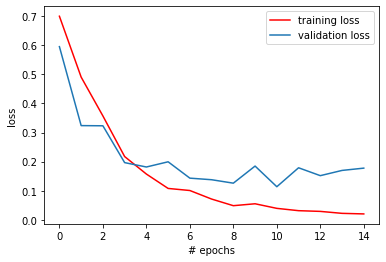

In [57]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## shows the training and validation accuracy from epochs data

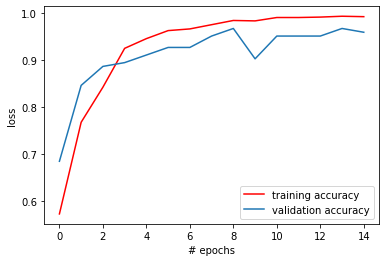

In [58]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [59]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 1s 260ms/step - loss: 0.2994 - accuracy: 0.9348
[0.29944896697998047, 0.9347826242446899]
